## Import Libraries to be used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

## Import Data
Downloaded from [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# check for duplicate values
df.duplicated().sum()

0

In [38]:
# no duplicate id#
df.id.duplicated().sum()

0

In [40]:
df[df['number_of_reviews']==0].isnull().sum()

id                                    0
name                                 10
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [28]:
10052 + 38843

48895

In [37]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [17]:
df.reviews_per_month.value_counts()

0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
16.22      1
9.33       1
12.99      1
11.72      1
11.03      1
Name: reviews_per_month, Length: 937, dtype: int64

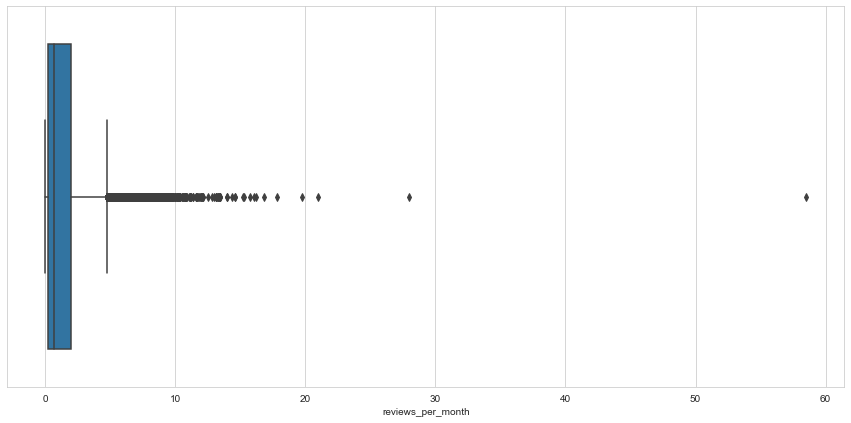

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x= df['reviews_per_month']);

In [41]:
df['reviews_per_month'].max()

58.5

NEXT STEP: REVIEW HIGH END OUTLIERS

In [6]:
df['reviews_per_month'].median()

0.72

In [4]:
df['reviews_per_month'].mode()

0    0.02
dtype: float64

In [23]:
rev_outliers_2 = df['reviews_per_month'].fillna(value=0)

In [24]:
rev_outliers_2

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [25]:
z = np.abs(stats.zscore(rev_outliers_2))
z

array([0.55151094, 0.4450791 , 0.68298556, ..., 0.68298556, 0.68298556,
       0.68298556])

In [47]:
rev_out = (np.abs(stats.zscore(rev_outliers_2)) < 3).all()

In [48]:
rev_out

False

In [36]:
to_remove = np.where(z > 3)
print(to_remove)

(array([  471,   534,   553,  1614,  1627,  1879,  2015,  2030,  2031,
        2163,  3053,  3105,  4870,  4940,  5219,  5253,  5382,  5702,
        5724,  5754,  5789,  5816,  5876,  6194,  6226,  6228,  6550,
        7086,  7175,  7317,  7667,  7884,  8001,  8103,  8352,  8362,
        8417,  9323,  9974,  9976, 10266, 10449, 10501, 10502, 10503,
       10505, 10506, 10623, 11129, 11253, 11453, 11759, 12464, 12714,
       13472, 13473, 13495, 13533, 13539, 13612, 14194, 14319, 14378,
       14639, 14699, 14708, 14751, 15150, 15503, 15549, 15618, 16136,
       16145, 16247, 16535, 16596, 17320, 17402, 17475, 17479, 17651,
       17700, 17771, 17818, 18045, 18068, 18118, 18396, 18592, 18703,
       18821, 18898, 19035, 19062, 19146, 19186, 19239, 19433, 19529,
       19554, 19597, 19598, 19639, 19649, 19712, 19770, 19811, 20041,
       20223, 20307, 20315, 20403, 20498, 20499, 20503, 20796, 20877,
       20947, 20988, 21100, 21187, 21268, 21399, 21464, 21492, 21517,
       21549, 21559

In [35]:
len(to_remove[0])

847

In [39]:
# replace null values with 0 to get z score and remove anything outside of 3 standard deviations
df['reviews_per_month'].fillna(value=0, inplace = True)

In [41]:
z2 = np.abs(stats.zscore(df['reviews_per_month']))

In [38]:
##df[(np.abs(stats.zscore(df[0])) < 3)]
df[]

KeyError: 1